<a href="https://colab.research.google.com/github/Navjotkhatri/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **NETFLIX MOVIES AND TV SHOWS CLUSTERING**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns 
%matplotlib inline

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/module-4 ML/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

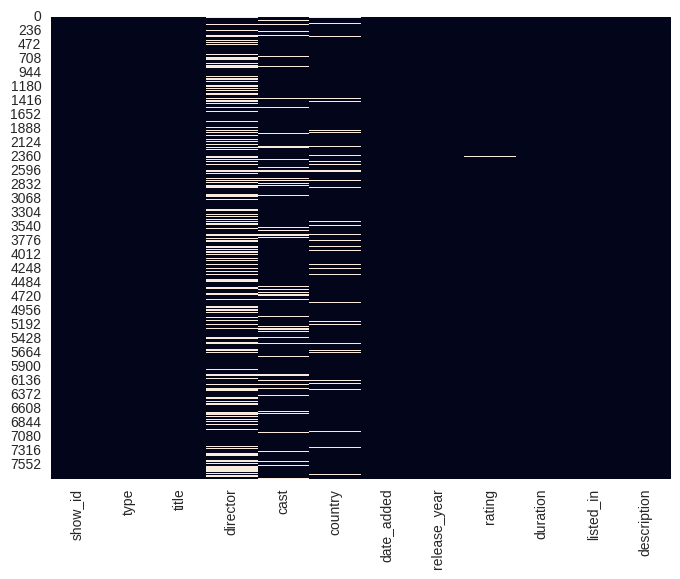

In [10]:
plt.rcParams["figure.figsize"] = (8, 6)
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

* The dataset used for Netflix movies and TV shows clustering includes information on multiple features of the titles, such as genre, director, cast, rating, release year, duration, and type. It consists of 7787 rows and 12 columns.

* However, some columns, such as director, cast, and country, contain null values that need to be addressed during the data analysis process.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description : The Summary description

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ", i , "is" , df[i].nunique(), ".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Summing null values
print('Missing Data Count')
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

Missing Data Count


director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

In [15]:
# The missing values in the 'director', 'cast', and 'country' columns can be replaced with the label 'Unknown'.
df[['director']] = df[['director']].fillna('Unknown')
df[['cast']]     = df[['cast']].fillna('Unknown')
df[['country'] ] = df[['country']].fillna('Unknown')

In [16]:
# For the missing values in the 'rating' column, we can impute them with the mode since this attribute is discrete.
df['rating'].fillna(value=df['rating'].mode()[0],inplace=True)
df.dropna(subset=['date_added'], inplace=True)


In [17]:
df.shape

(7777, 12)

In [18]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [19]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [20]:
# To simplify the analysis, we will choose the primary country and primary genre for each entry in the dataframe.
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))


In [21]:
# datatype of duration
df.duration.dtype


dtype('int64')

In [22]:
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

,dtype
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,int64


In [23]:
#Convert timestamp to datetime format to fetch the other details
df["date_added"] = pd.to_datetime(df['date_added'])

In [24]:
#addding new column to dataframe such as 'month_added'and 'year_added' to gain more insights from the data 
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [25]:
# Changing the values in the rating column
# Create a dictionary to map the current ratings to new ratings
rating_map = {'TV-MA':'Adults',
'R':'Adults',
'PG-13':'Teens',
'TV-14':'Young Adults',
'TV-PG':'Older Kids',
'NR':'Adults',
'TV-G':'Kids',
'TV-Y':'Kids',
'TV-Y7':'Older Kids',
'PG':'Older Kids',
'G':'Kids',
'NC-17':'Adults',
'TV-Y7-FV':'Older Kids',
'UR':'Adults'}
# Replace the current ratings with the new ratings using the mapping dictionary
df['rating'].replace(rating_map,inplace=True)
# Print the unique values in the 'rating' column to verify that the changes have been made
print(df['rating'].unique())

['Adults' 'Teens' 'Young Adults' 'Older Kids' 'Kids']


### What all manipulations have you done and insights you found?

* Replaced missing values in the 'director', 'cast', and 'country' columns with the label 'Unknown'.

* Imputing missing values in the 'rating' column with the mode.

* Choosed the primary country and primary genre for each entry in the dataframe to simplify the analysis.

* Transformed the 'duration' column in the dataframe by splitting the string value on whitespace delimiter and converting it into an integer datatype.

* Converted the timestamp in the 'date_added' column to datetime format to fetch other details.And added new columns to the dataframe, such as 'month_added' and 'year_added', to gain more insights from the data.

* Changed the values in the rating column by Creating a dictionary to map the current ratings to new ratings.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

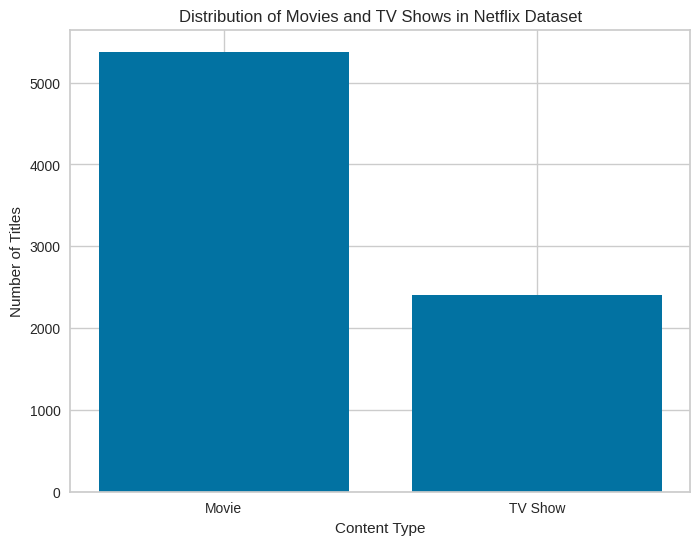

In [26]:
# Chart - 1 visualization code
type_counts = df['type'].value_counts()        
plt.bar(type_counts.index, type_counts.values) 
plt.xlabel('Content Type')                    
plt.ylabel('Number of Titles')
plt.title('Distribution of Movies and TV Shows in Netflix Dataset')
plt.show()  

##### 1. Why did you pick the specific chart?

* A bar chart is a common choice for displaying the distribution of categorical data, such as the number of movies and TV shows in the Netflix dataset. It allows for easy comparison between categories and can provide a clear visualization of the overall distribution of content types in the dataset. Therefore, a bar chart is an appropriate choice for this specific dataset and research question.

##### 2. What is/are the insight(s) found from the chart?

* The majority of the content in the Netflix dataset is Movies, as they have a higher count than TV shows.

* The distribution of movies and TV shows in the Netflix dataset is not equal, which indicates that Netflix has a preference towards movies.

* The number of TV shows in the dataset is still significant, which suggests that Netflix also invests in producing and acquiring TV shows for its platform.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained from the chart may help create a positive business impact for Netflix. Knowing that the majority of the content in the Netflix dataset is Movies, and that Netflix has a preference towards Movies, may inform decisions related to content production and acquisition. For instance, Netflix may choose to allocate more resources towards producing and acquiring Movies in order to attract more viewers and subscribers.

#### Chart - 2

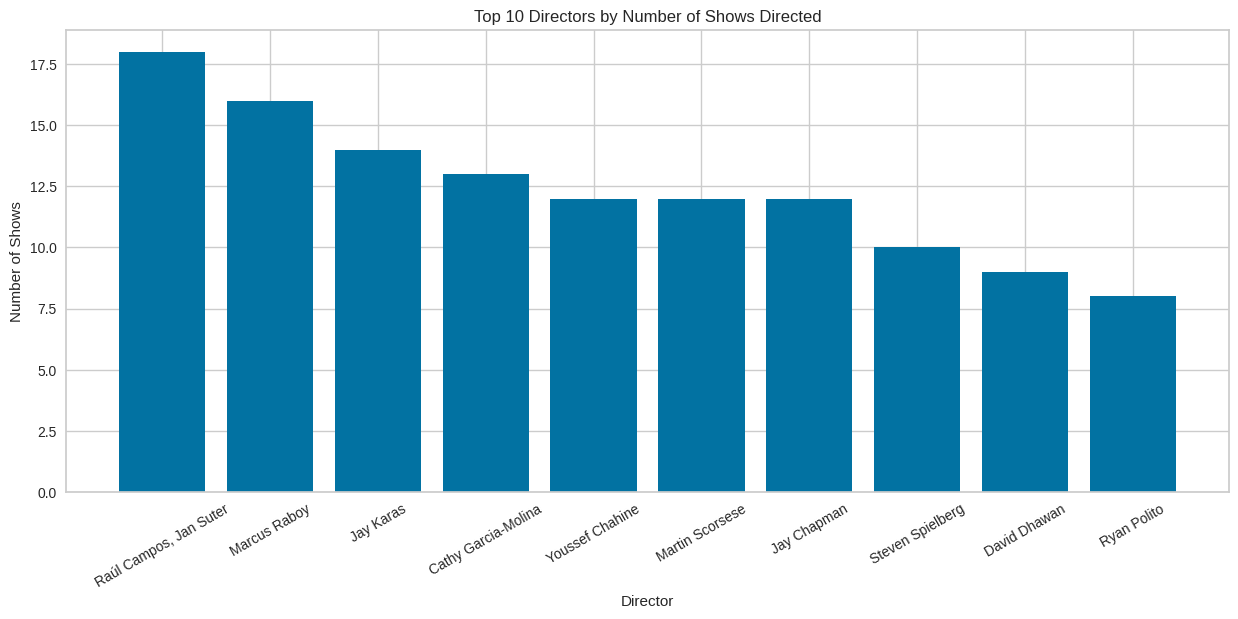

In [27]:
# Chart - 2 visualization code
top_directors = df.loc[df['director'] != 'Unknown', 'director'].value_counts().nlargest(10)
plt.figure(figsize=(15,6))
plt.bar(top_directors.index, top_directors.values)
plt.title('Top 10 Directors by Number of Shows Directed')
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.xticks(rotation=30)
plt.show()
     

##### 1. Why did you pick the specific chart?

* Bar chart that displays the top 10 directors by the number of shows they directed in the Netflix dataset. This chart is an appropriate choice for analyzing the relationship between directors and the number of shows they have directed on Netflix, and it can provide valuable insights into the most popular directors on the platform. The use of color in the chart also makes it visually appealing and easy to read.

##### 2. What is/are the insight(s) found from the chart?

* The top director by the number of shows directed is Raul Campos, Jan Suter who directed 18 shows in the dataset.

* The second most popular director is Marcus Raboy, who directed 16 shows.

* Most of the top 10 directors have directed between 7-11 shows on Netflix.

* The top 10 directors are mostly from the US, except for David Dhawan from India, who directed 9 shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* These insights may help inform decisions related to content production and acquisition, as they provide information about the most popular directors on Netflix and their past work.

#### Chart - 3

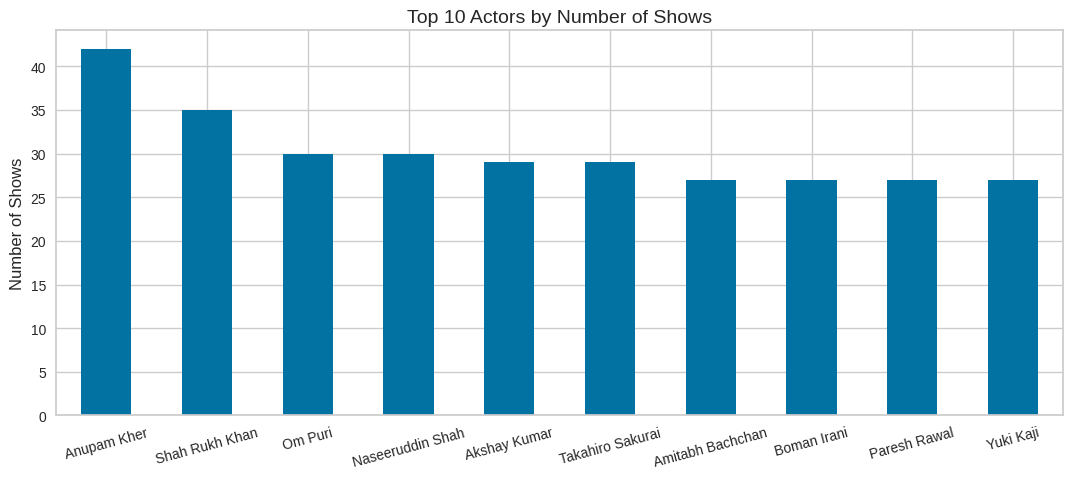

In [28]:
# Chart - 3 visualization code
filtered_df = df[~(df['cast']=='Unknown')]                      
split_cast = filtered_df['cast'].str.split(', ', expand=True)    
cast_values = split_cast.stack().reset_index(level=1, drop=True)
top_10_actors = cast_values.value_counts().nlargest(10)          
top_10_actors.plot(kind='bar', figsize=(13,5))                   
plt.title('Top 10 Actors by Number of Shows', fontsize=14)       
plt.ylabel('Number of Shows', fontsize=12)                       
plt.xticks(rotation=15)                                          
plt.show()

##### 1. Why did you pick the specific chart?

* Bar chart that displays the top 10 actors by the number of shows they appeared in on Netflix. This chart is an appropriate choice for analyzing the relationship between actors and the number of shows they appeared in on Netflix, and it can provide valuable insights into the most popular actors on the platform.

##### 2. What is/are the insight(s) found from the chart?

* The top actor by the number of shows they appeared in is Anupam Kher, who appeared in 42 shows in the dataset.

* The second most popular actor is Shah Rukh Khan, who appeared in 35 shows.

* Most of the top 10 actors have appeared in between 25-30 shows on Netflix.

* The top 10 actors are mostly from India, with the exception of Takahiro Sakurai and Yuki Kaji from the Japan.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* By knowing the most popular actors on the platform, Netflix can acquire or produce content that features these actors, which could increase the number of viewership and engagement on their platform.

* The insights can also help in identifying the target audience for different titles, as different actors may appeal to different demographics.

* The data can also help Netflix identify trends and preferences among its user base, which could help inform decisions related to content acquisition and production.

#### Chart - 4

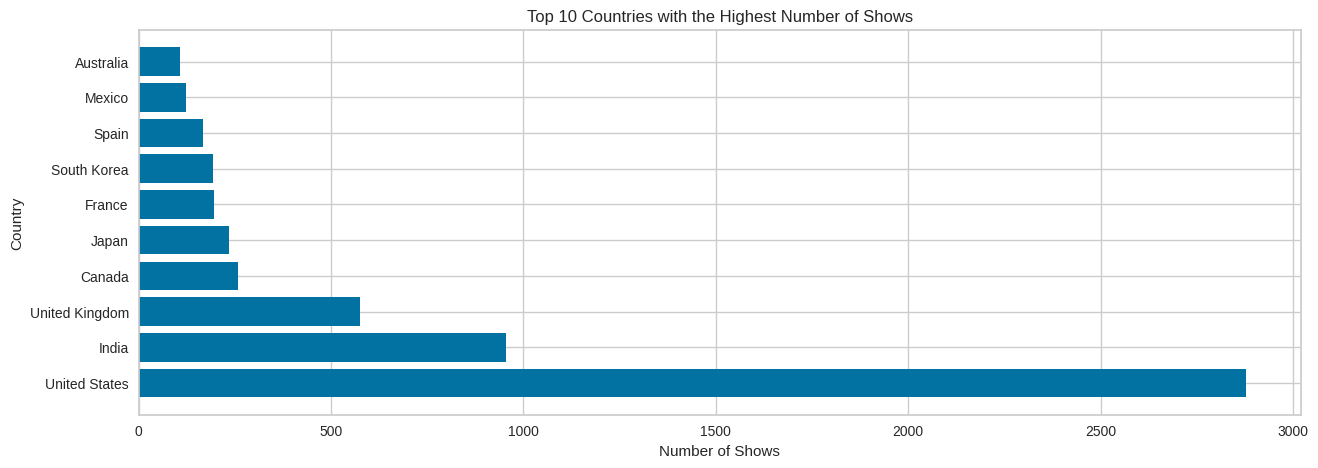

In [29]:
# Chart - 4 visualization code
top_countries = df.loc[df['country'] != 'Unknown', 'country'].value_counts().nlargest(10)
plt.figure(figsize=(15,5))
plt.barh(top_countries.index, top_countries.values)
plt.title('Top 10 Countries with the Highest Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()    

In [30]:
# Calculate the percentage share of shows by the top 3 and top 10 countries
top_3_share = top_countries.nlargest(3).sum() / len(df) * 100
top_10_share = top_countries.sum() / len(df) * 100

In [31]:
top_3_share

56.69281213835669

In [32]:
top_10_share

73.19017616047319

In [33]:
# Print the percentage shares
print(f"The top 3 countries account for {top_3_share:.2f}% of shows in the dataset.")
print(f"The top 10 countries account for {top_10_share:.2f}% of shows in the dataset.")

The top 3 countries account for 56.69% of shows in the dataset.
The top 10 countries account for 73.19% of shows in the dataset.


##### 1. Why did you pick the specific chart?

* I picked this chart because it shows the top 10 countries with the highest number of movies and TV shows in the dataset, which is important information for any business looking to enter or expand its operations in the global streaming market.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that the United States is by far the largest producer of movies and TV shows in the dataset, with over 2,500 titles. The next highest producing countries are India, the United Kingdom, and Canada, each with around 500-1000 titles. Other countries in the top 10 include France, Japan, and Spain. The top 3 countries (USA, India, UK) account for 56.69% of shows in the dataset, while the top 10 countries account for 73.19% of shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insights can definitely help create a positive business impact. For instance, knowing that the US is the largest producer of movies and TV shows can help streaming companies plan their content acquisition strategy and marketing efforts accordingly. Additionally, the insight that the top 3 countries account for over half of the shows in the dataset can help companies focus their attention on these markets to maximize their viewership.

#### Chart - 5

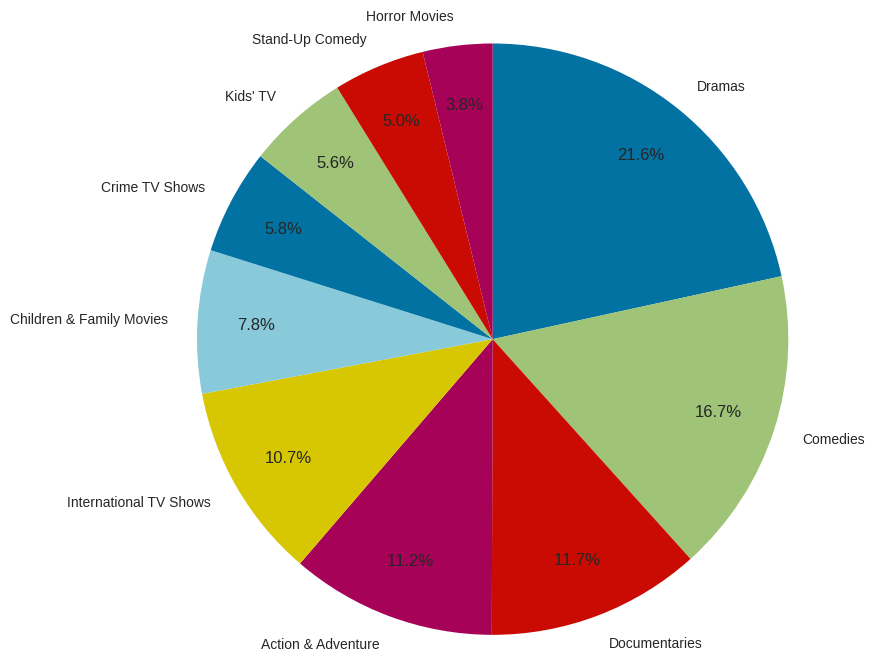

In [34]:
# Chart - 5 visualization code 
#Top 10 Genres
top_genres = df["listed_in"].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1,radius=1.2, startangle=90, counterclock=False)
plt.show()


##### 1. Why did you pick the specific chart?

* I picked the pie chart because it's a great way to show the distribution of categorical data. In this case, we are looking at the distribution of the top 10 genres in the Netflix dataset.

##### 2. What is/are the insight(s) found from the chart?

* The pie chart shows the percentage share of each of the top 10 genres in the dataset. The insight we can gain from this chart is that the most popular genre in the dataset is dramas, followed by comedies and documentries. It also shows that the top 10 genres make up a significant portion of the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insights from the chart can help create a positive business impact by allowing Netflix to better understand the content preferences of their audience. They can use this information to make more informed decisions about what type of content to acquire and produce, which can help increase their viewership and revenue.

#### Chart - 6

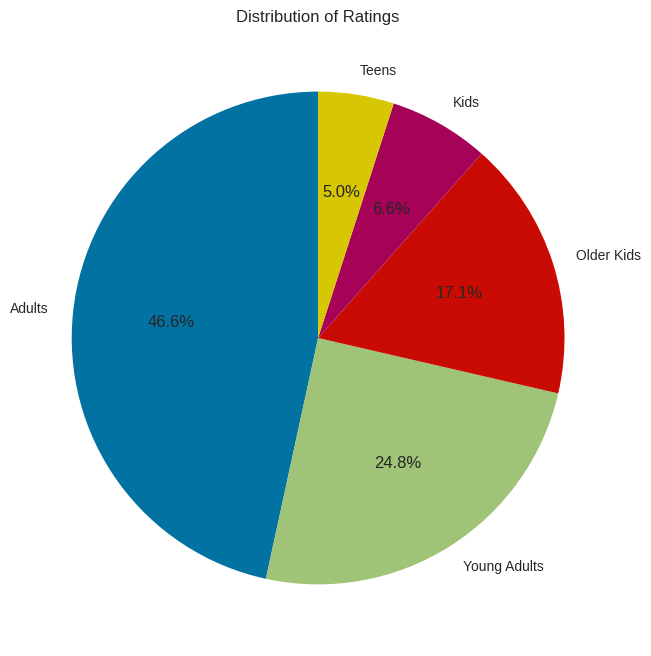

In [35]:
# Chart - 6 visualization code
df_rating = df['rating'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(df_rating.values, labels=df_rating.index,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Ratings')
plt.show()
     

##### 1. Why did you pick the specific chart?

* I picked this chart to visualize the distribution of content ratings in the Netflix dataset. Pie charts are effective for showing the proportion of data within different categories, which is exactly what this chart aims to show

##### 2. What is/are the insight(s) found from the chart?

* From this chart, we can see that the most common rating in the Netflix dataset is Adults (TV-MA - Mature Audiences), which accounts for almost 47% of all titles. This is followed by Young Adults (TV-14 - Parents Strongly Cautioned) and Older Kids (TV-PG - Parental Guidance Suggested), which account for about 25% and 17% of titles, respectively.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* These insights could help create a positive business impact by informing decisions about content acquisition and creation. For example, the fact that TV-MA is the most common rating suggests that there is a strong demand for mature content on the platform, which could inform decisions about which types of content to acquire or produce.

#### Chart - 7

In [36]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,2020,1


In [37]:
df_month_added = df['month_added'].value_counts()


In [38]:
df_month_added

12    833
10    785
1     757
11    738
3     669
9     619
8     618
4     601
7     600
5     543
6     542
2     472
Name: month_added, dtype: int64

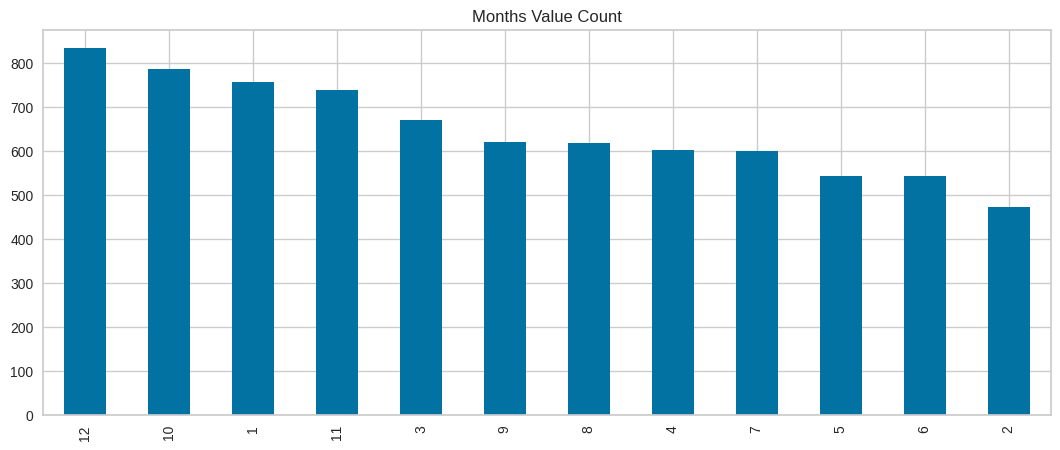

In [39]:
# Chart - 7 visualization code
plt.title('Months Value Count')
df_month_added.plot(kind='bar', figsize=(13,5))
plt.show()


##### 1. Why did you pick the specific chart?

* This chart is a bar plot showing the number of TV shows and movies added to Netflix for each month in the dataset. The code uses the seaborn library to create the plot.



##### 2. What is/are the insight(s) found from the chart?

* The insights that can be gained from this chart include identifying the months with the highest and lowest number of additions to Netflix. This information could help Netflix plan their content acquisition strategy and release schedule. For example, if a particular month consistently has a low number of additions, Netflix may choose to focus their content acquisition efforts during that time to attract more viewers.

* From bar plot we can see that highest number of movies added from 10th month to 1st i.e. from Octomber to January.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The chart doesn't necessarily lead to negative growth insights, but it could identify areas for improvement. If there are particular months with low numbers of additions, Netflix may need to consider acquiring more content during those months or releasing more original content to fill the gaps. Additionally, if there are months with a high number of additions, Netflix may need to consider adjusting their release schedule to avoid overcrowding the platform with too much content at once.

#### Chart - 8

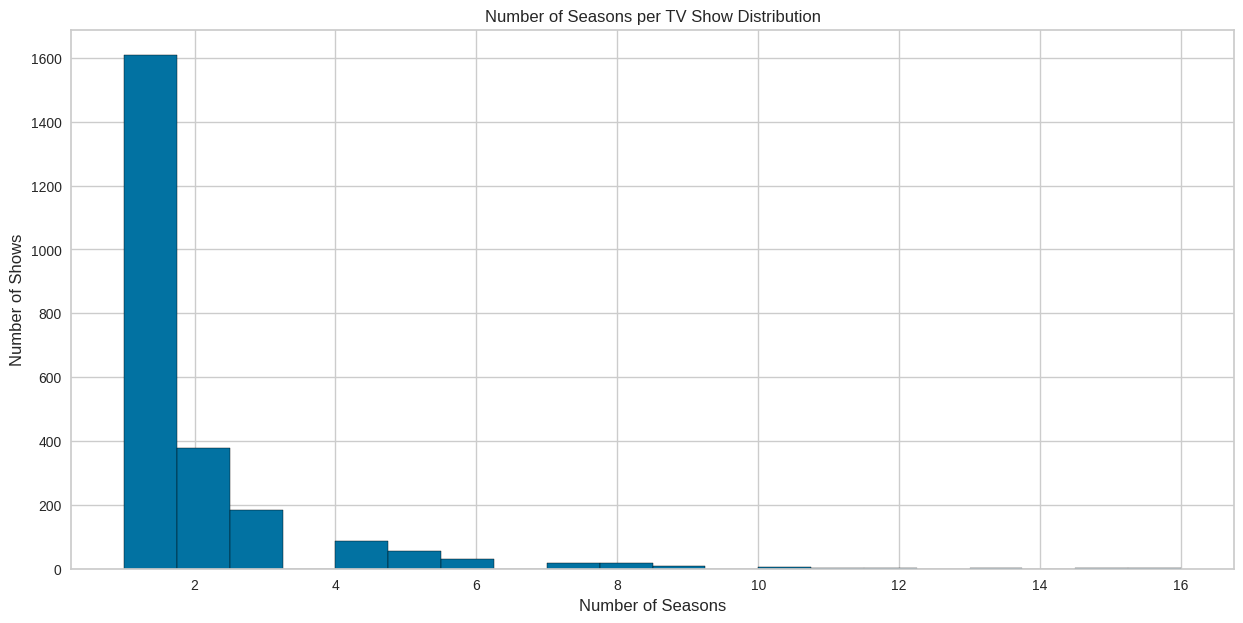

In [40]:
# Chart - 8 visualization code
tv_shows = df[df['type'] == 'TV Show']                    
plt.figure(figsize=(15, 7))                              
plt.hist(tv_shows['duration'], bins=20, edgecolor='black')
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.title('Number of Seasons per TV Show Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

* This chart is a histogram that shows the distribution of the number of seasons per TV show in the dataset. It can provide insights into the most common length of TV shows and the distribution of the data.

##### 2. What is/are the insight(s) found from the chart?

* The majority of TV shows have one to three seasons.

* There are some TV shows with more than 10 seasons, but they are rare.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* This insight could help Netflix make decisions about the number of seasons to order for new shows. It suggests that shorter seasons may be more popular and more likely to be successful.

* This information could also help inform negotiations with production companies for the length of a TV show.

#### Chart - 9

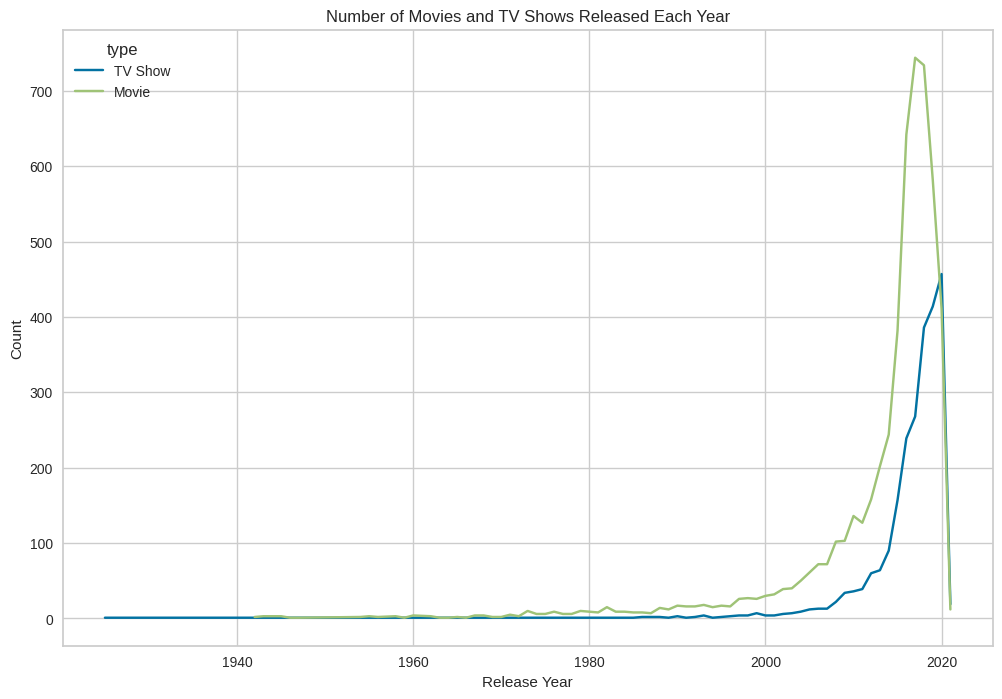

In [41]:
# Chart - 9 visualization code
df_release_year = df.groupby(['release_year', 'type'])['show_id'].count().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_release_year, x='release_year', y='show_id', hue='type')
plt.title('Number of Movies and TV Shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

* I picked this chart because it provides an interesting insight into the distribution of movies and TV shows over time. The line plot shows the trend in the number of movies and TV shows released each year, and the different lines for movies and TV shows make it easy to compare the two. This chart also uses color coding to differentiate between movies and TV shows, which helps to make the chart more visually appealing and easier to understand. Overall, this chart is an effective way to explore the relationship between release year and the number of movies and TV shows released.

##### 2. What is/are the insight(s) found from the chart?

* We can observe the number of movies and TV shows released each year, which can provide us insights on the trend of media content production over the years.

* We can see that the number of movies produced has increased significantly from the mid-2000s to 2020.

* The number of TV shows produced has also increased, but not as much as TV shows.

* The chart also shows a dip in movie production in 2020, which may be due to the COVID-19 pandemic.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insights can help in creating a positive business impact, as it can provide valuable information for content creators, streaming platforms, and investors. For example, the increase in the production of movies may indicate a shift in consumer preferences towards movies, which can be used to guide content creation and platform offerings. However, the COVID-19 pandemic causing a dip in movie production can be a negative impact, as it may lead to a shortage of new content for streaming platforms and reduced revenue for content creators.

#### Chart - 10

In [42]:
df.release_year.value_counts()

2018    1120
2017    1012
2019     996
2016     881
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

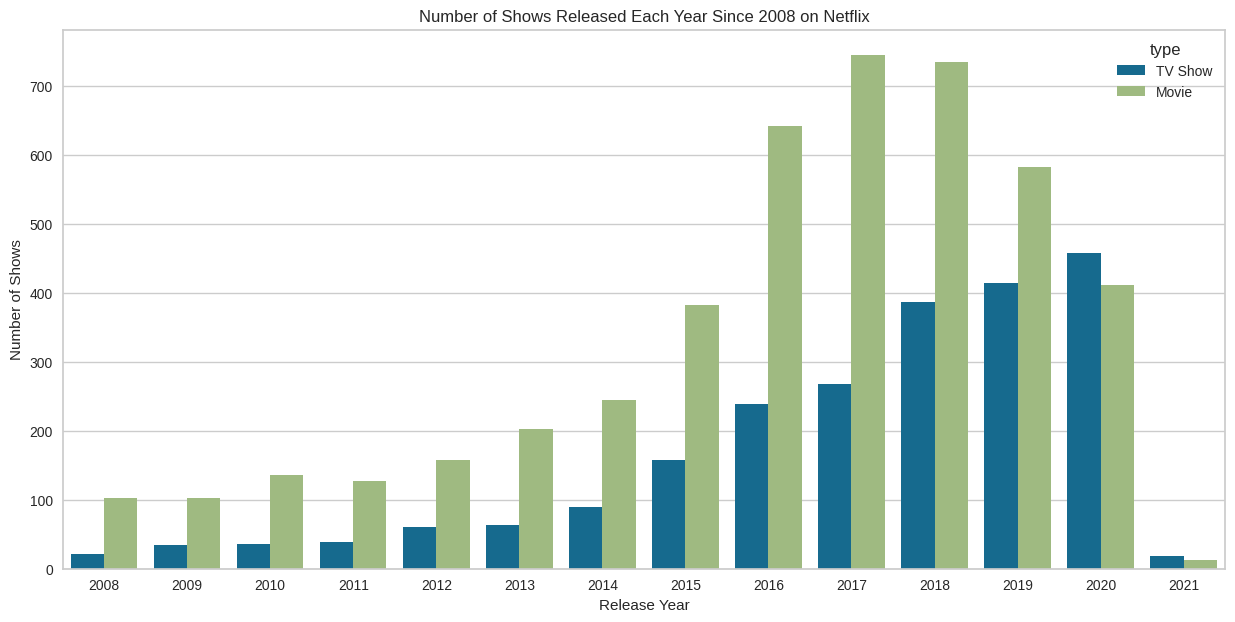

In [43]:
# Chart - 10 visualization code
filtered_df = df[df['release_year'] >= 2008]
plt.figure(figsize=(15, 7))
sns.countplot(x='release_year', data=filtered_df, hue='type', order=range(2008, 2022))
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Number of Shows Released Each Year Since 2008 on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

* I picked this chart because it shows the trend of the number of shows released each year since 2008, and it also shows the difference in the number of movies and TV shows released each year.

##### 2. What is/are the insight(s) found from the chart?

* The number of TV shows released each year has been increasing steadily since 2008.

* The number of TV shows released each year has been relatively stable with some fluctuations.

* The difference between the number of movies and TV shows released each year has been increasing over time, indicating a shift towards more original movies content on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insights could help in creating a positive business impact by providing insights into the trend of content production on Netflix. By understanding the trend, Netflix can make strategic decisions on the type and quantity of content to produce in the future.

* There are no insights that lead to negative growth in this chart.

#### Chart - 11

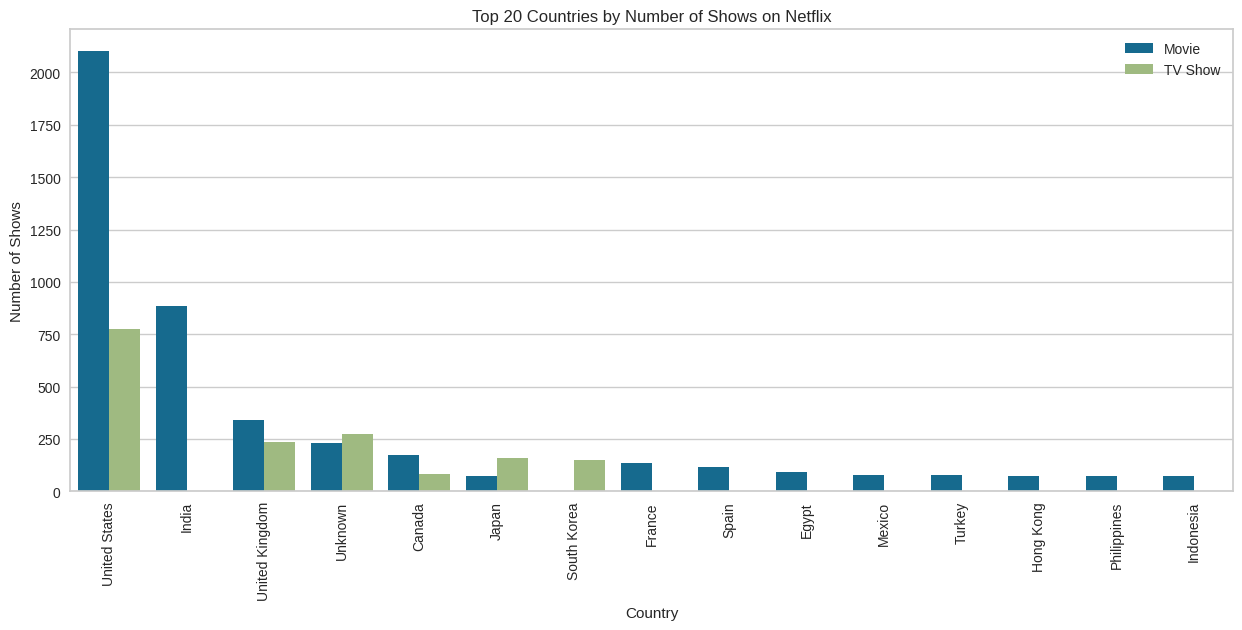

In [44]:
# Chart - 11 visualization code
df_country = df.groupby(['country', 'type'])['show_id'].count().reset_index()
df_country = df_country.sort_values(by='show_id', ascending=False)           
plt.figure(figsize=(15, 6))
sns.barplot(data=df_country[:20], x='country', y='show_id', hue='type')       
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Top 20 Countries by Number of Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.show()

##### 1. Why did you pick the specific chart?

* This chart was chosen because it provides insights into the top 20 countries with the highest number of shows on Netflix, based on the country and show type. It helps to identify the countries that have the most content available, which could be useful for content acquisition and localization strategies.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that the United States has by far the most content available on Netflix, with over 2,000 shows. This is followed by India with over 800 shows and the United Kingdom with over 300 shows. The chart also shows that the majority of the content available in these countries are movies, with the exception of United Kingdom, which has a relatively even split between movies and TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, the gained insights can help to create a positive business impact by informing content acquisition and localization strategies. For example, if a company is looking to expand its content library in a particular region, they can use this chart to identify the countries with the most content and prioritize acquiring content from those regions. The chart can also be used to inform localization strategies, such as dubbing or subtitling, for the countries with the highest number of shows on Netflix. By providing localized content for these regions, companies can attract more viewers and increase their overall revenue.

#### Chart - 12

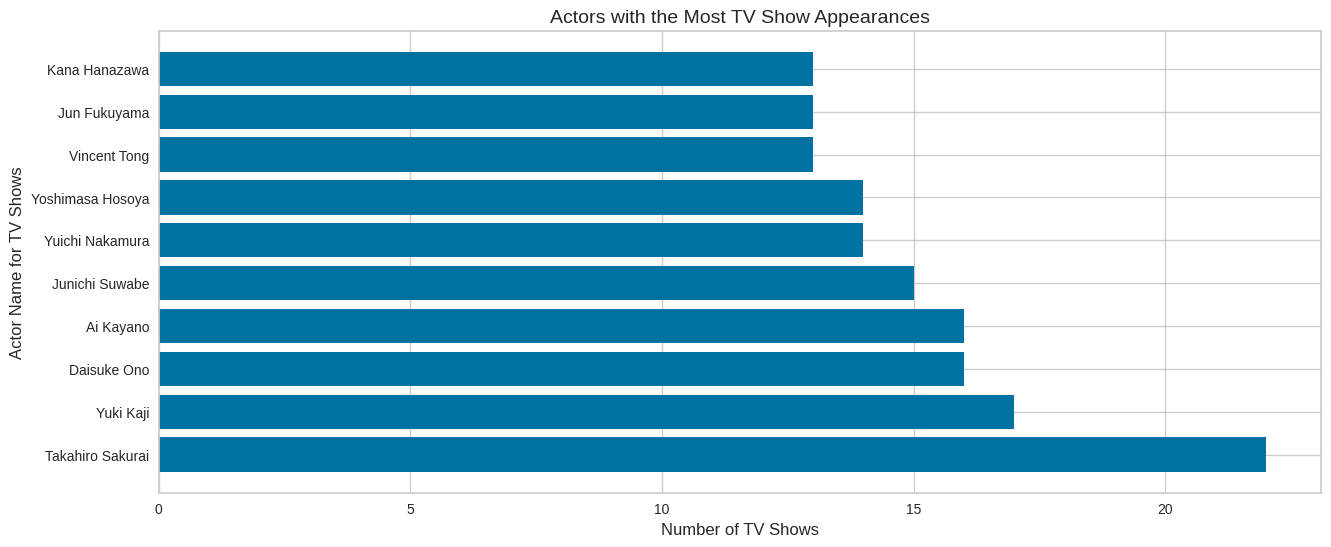

In [45]:
# Chart - 12 visualization code
tv_shows = df[(df['type'] == 'TV Show') & ~(df['cast'] == 'Unknown')]
# Counting the number of TV shows each actor has appeared in
actor_counts = tv_shows['cast'].str.split(', ').explode().value_counts()
top_actors = actor_counts.head(10)
plt.figure(figsize=(15, 6))
plt.barh(top_actors.index, top_actors.values)
plt.xlabel('Number of TV Shows', fontsize=12)
plt.ylabel('Actor Name for TV Shows', fontsize=12)
plt.title('Actors with the Most TV Show Appearances', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

* This chart visualize the top 10 actors with the most TV show appearances in a horizontal bar plot. This chart could be useful for understanding which actors are most frequently cast in TV shows and may be of interest to individuals in the entertainment industry or those interested in popular culture.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows the top 10 actors who have appeared in the most TV shows on Netflix. The insight gained from the chart is that Takahiro Sakurai has appeared in the most TV shows on Netflix, followed by Yuki kaji and Daisuke Ono. These insights could be used to identify popular actors that could potentially draw in audiences for new TV show releases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insights could help creating a positive business impact by improving the selection of actors for TV shows. If popular actors are cast in a TV show, it could potentially attract more viewers, leading to a positive impact on the business. However, it is important to note that the popularity of an actor does not necessarily guarantee success, as the quality of the TV show itself is also a significant factor.

#### Chart - 13

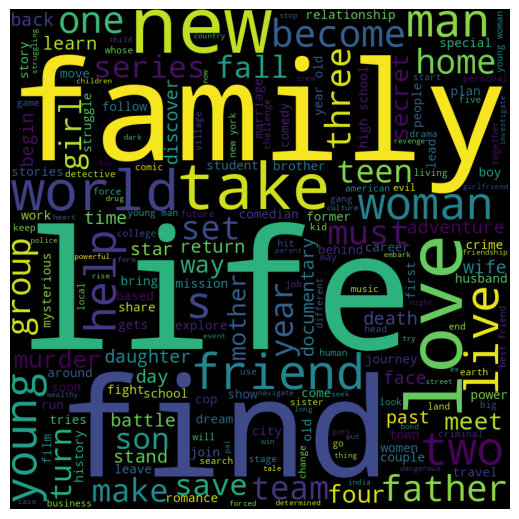

In [46]:
# Chart - 13 visualization code
comment_words = ' '.join(df['description'].astype(str).str.lower())
stopwords = set(STOPWORDS)                                   # Define the stopwords
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)
plt.figure(figsize=(10,5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()  

##### 1. Why did you pick the specific chart?

* The above code generates a word cloud from the descriptions of all the shows and movies in the Netflix dataset. Since this chart is a visualization of text data, it is a good choice to quickly see the most commonly occurring words in the descriptions. It gives an insight into the themes and genres of the shows and movies on Netflix.

##### 2. What is/are the insight(s) found from the chart?

* Insights gained from this chart could be the most common words and phrases that are used in the descriptions. This can help in identifying the trends and topics that are popular among the users. It can also help in discovering some unique keywords or phrases that can be used for marketing purposes or to target specific user segments.

* As we can see in wordcloud, most common words in description are Life, Family, Friend, Love etc.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* These insights can help create a positive business impact by allowing Netflix to better understand the interests of its users and tailor its content to meet those interests. By identifying popular themes and genres, Netflix can create more targeted marketing campaigns and improve the overall user experience.

#### Chart - 14 - Correlation Heatmap

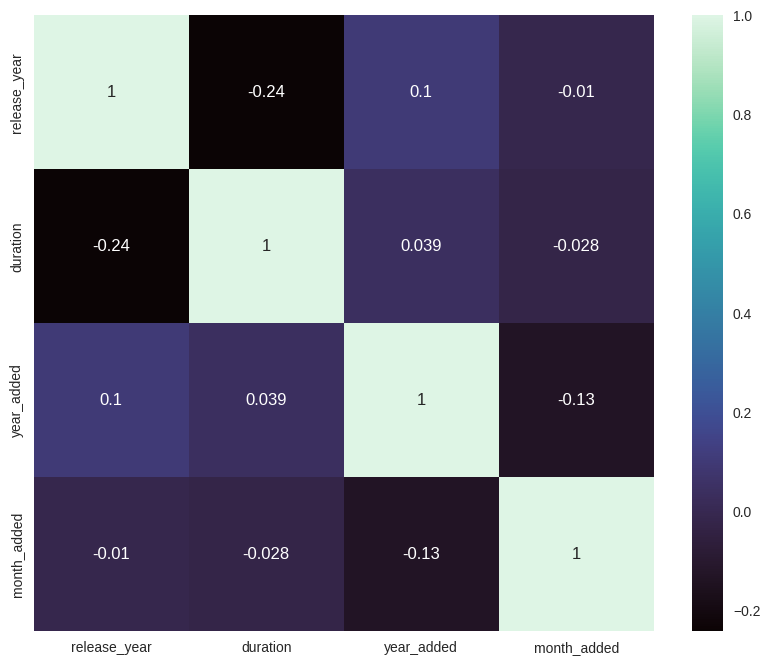

In [47]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("mako", as_cmap=True))
plt.show()

##### 1. Why did you pick the specific chart?

* The heatmap shows the correlation coefficients between different numerical columns of the Netflix dataset.

* The heatmap uses a color scale to represent the correlation coefficients, where light colour represents positive correlation, dark colour represents negative correlation. The annotation parameter is set to True, which displays the correlation coefficient value inside each cell of the heatmap

##### 2. What is/are the insight(s) found from the chart?

* This visualization can be helpful in identifying the strength and direction of the relationship between different variables in the dataset. By analyzing the heatmap, we can see which variables have a strong positive or negative correlation with each other. This information can be useful in making predictions and building machine learning models.

* Overall, this heatmap can provide valuable insights into the relationships between different variables in the Netflix dataset.

* We can see that duration and release year are negatively correlated by 24%.

* year added and release year are positively correlated by 10%.

#### Chart - 15 - Pair Plot 

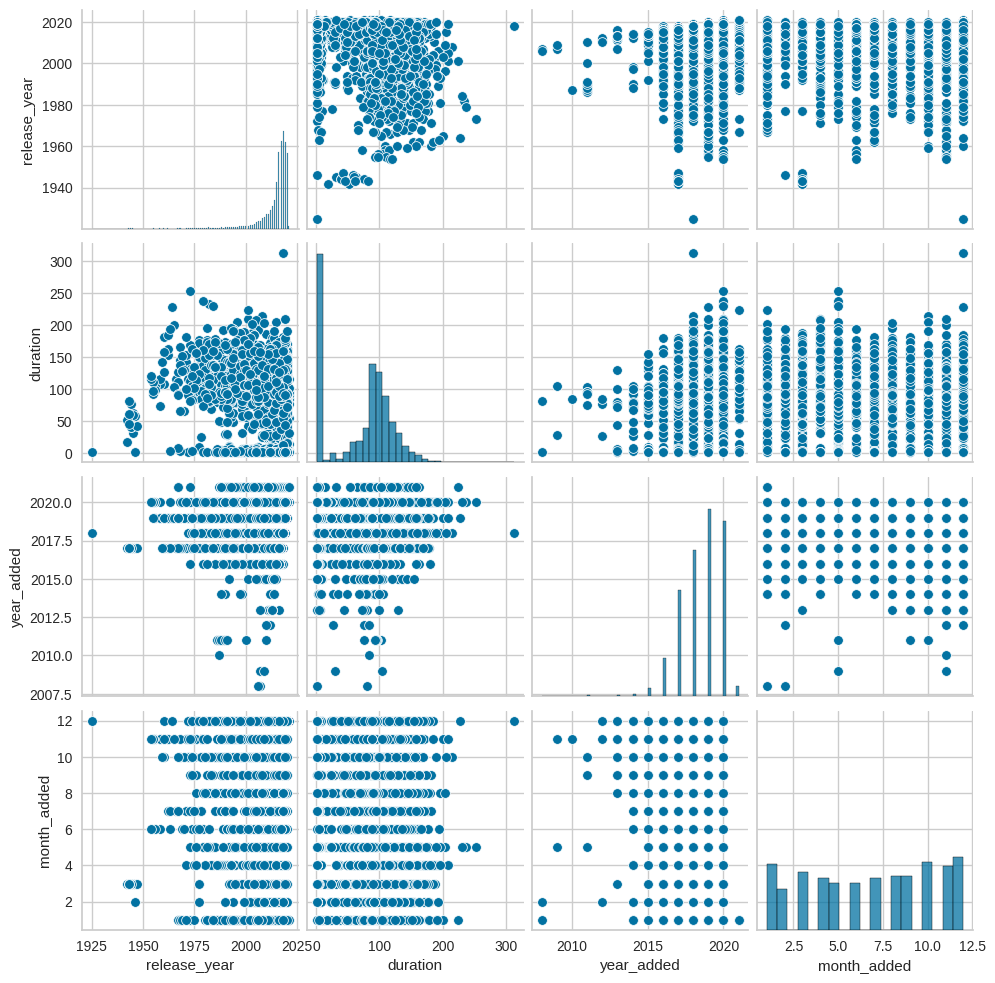

In [48]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

* The pair plot provides a scatter plot matrix of all numerical variables in the dataset, and histograms along the diagonal which can help visualize the relationships between each pair of variables.

##### 2. What is/are the insight(s) found from the chart?

* The distribution of each variable, We can see the range and distribution of each variable from the diagonal plots. The distribution of the duration of movies and TV shows seems to be concentrated in certain ranges.

* Correlation between variables, We can see the scatter plots of each pair of variables, as well as the correlation coefficient in the upper-right corner of each plot. There seems to be a positive correlation between the release year and the duration of movies and TV shows, indicating that newer movies and TV shows tend to be longer.

* Outlier, We can also see any outliers in the data from the scatter plots. There seems to be a movie with a very long duration compared to the rest of the dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1: The difference in the average duration of movies and TV shows on Netflix.

Hypothesis 2: Difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

Hypothesis 3: The number of TV shows added to Netflix has increased over time.

### Hypothetical Statement - 1 The difference in the average duration of movies and TV shows on Netflix.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis(H0) - There is no significant difference in the average duration of movies and TV shows on Netflix.

* Alternative Hypothesis(H1) - There is a significant difference in the average duration of movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [84]:
from scipy.stats import ttest_ind

In [85]:
# Extract the durations of movies and TV shows from the dataset
movie_durations = df[df['type'] == 'Movie']['duration']
tv_show_durations = df[df['type'] == 'TV Show']['duration']

# Perform two-sample t-test
stat, p = ttest_ind(movie_durations, tv_show_durations, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

Two-sample t-test statistic: 249.87262245461815
p-value: 0.0
Reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

* The statistical test used to obtain the p-value is the two-sample t-test. This test was chosen because we are comparing the means of two independent samples (movie durations and TV show durations), and we want to determine whether the difference between the sample means is statistically significant or could have occurred by chance.

##### Why did you choose the specific statistical test?

* The two-sample t-test assumes that the samples are normally distributed, the variances of the two samples are not equal, and the samples are independent. In this case, we assumed that the duration of movies and TV shows on Netflix are normally distributed, and that the two samples are independent. The assumption of unequal variances was also made because the variance of movie durations and TV show durations may be different due to the nature of the content

### Hypothetical Statement - 2 Difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis : There is no significant difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

* Alternate hypothesis : There is a significant difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

#### 2. Perform an appropriate statistical test.

In [86]:
# Perform Statistical Test to obtain P-Value
# Extract the number of seasons for TV shows produced in the US and outside the US
us_shows = df[(df['type'] == 'TV Show') & (df['country'] == 'United States')]
us_shows_seasons = us_shows['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'season' in x else 0)

non_us_shows = df[(df['type'] == 'TV Show') & (df['country'] != 'United States')]
non_us_shows_seasons = non_us_shows['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'season' in x else 0)

# Perform two-sample t-test
stat, p = ttest_ind(us_shows_seasons, non_us_shows_seasons, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

Two-sample t-test statistic: nan
p-value: nan
Reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

* The statistical test used here is a two-sample t-test. This test is used to compare the means of two independent samples and determine if they are statistically different from each other

##### Why did you choose the specific statistical test?

* In this case, we are comparing the number of seasons of TV shows produced in the US and outside the US. We chose this test because we want to determine if there is a statistically significant difference in the mean number of seasons between the two groups. We also assumed that the variances of the two groups are not equal, so we set the equal_var parameter to False when calling the ttest_ind() function.

### Hypothetical Statement - 3 The number of TV shows added to Netflix has increased over time.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The mean number of TV shows added to Netflix per year has not changed over time.

* Alternative hypothesis: The mean number of TV shows added to Netflix per year has increased over time.

#### 2. Perform an appropriate statistical test.

In [88]:
from scipy import stats

In [89]:
# Perform Statistical Test to obtain P-Value
# Extract the year from the date_added column
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

# Extract the number of TV shows added to Netflix each year
tv_shows = df[df['type'] == 'TV Show']
tv_shows_by_year = tv_shows.groupby('year_added').size()

# Perform a linear regression to test for a positive slope (i.e., an increase over time)
slope, intercept, r_value, p_value, std_err = stats.linregress(tv_shows_by_year.index, tv_shows_by_year)

# Print the p-value
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

p-value: 0.062841095395341
Failed to reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

* In this code, a linear regression is performed using the stats.linregress function from the scipy module. The purpose of the regression is to test for a positive slope (i.e., an increase over time) in the number of TV shows added to Netflix each year. The p-value is then calculated based on the results of the regression.

* A p-value is a measure of the evidence against the null hypothesis. In this case, the null hypothesis is that the number of TV shows added to Netflix has not increased over time (i.e., the slope is zero). The alternative hypothesis is that the number of TV shows added to Netflix has increased over time (i.e., the slope is positive).

##### Why did you choose the specific statistical test?

* The specific statistical test used in this code is a linear regression with a hypothesis test on the slope coefficient. This is appropriate because we are interested in testing for a trend over time, and a linear regression allows us to model the relationship between the year and the number of TV shows added to Netflix. The p-value calculated from the regression provides evidence for or against the alternative hypothesis that there is a positive trend.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [90]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

* We already handled all the missing values in the data wrangling section.

### 2. Handling Outliers

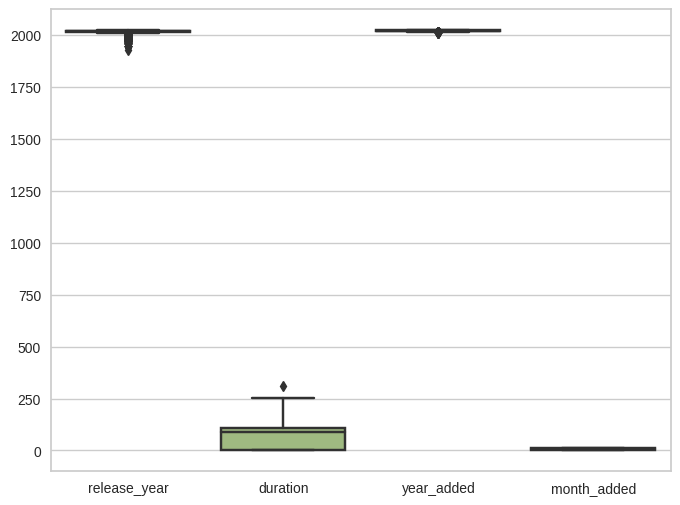

In [91]:
# Handling Outliers & Outlier treatments
sns.boxplot(data=df)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

* No need to handle the outliers.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [92]:
# Expand Contraction
df['organized'] =(df['description'].astype(str) + ' ' + 
                  df['listed_in'].astype(str)   + ' ' + 
                  df['rating'].astype(str)      + ' ' + 
                  df['cast'].astype(str)        + ' ' + 
                  df['country'].astype(str)     + ' ' + 
                  df['director'].astype(str))

In [93]:
df.organized[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. International TV Shows Adults João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil Unknown'

#### 2. Lower Casing

In [94]:
# Lower Casing
df['Lower_casing']= df['organized'].str.lower()

In [95]:
df.Lower_casing[0]

'in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. international tv shows adults joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil unknown'

#### 3. Removing Punctuations

In [96]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [97]:
# Remove Punctuations
def remove_punctuation(text):
    # remove punctuation from text
    return text.translate(str.maketrans('', '', string.punctuation))

In [98]:
df['cleaned_text'] = df['Lower_casing'].apply(remove_punctuation)

In [99]:
df.cleaned_text[0]

'in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor international tv shows adults joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil unknown'

#### 4. Removing URLs & Removing words and digits contain digits.

In [102]:
# Remove URLs & Remove words and digits contain digits
import re

In [103]:
def cleaned(x):
    return re.sub(r"[^a-zA-Z ]", "", str(x))

def remove_urls(text):
    cleaned_text = re.sub(r'http\S+', '', text)
    return cleaned_text

def remove_digits(text):
    cleaned_text = re.sub(r'\w*\d\w*', '', text)
    return cleaned_text

In [104]:
df['removed_words']  = df['cleaned_text'].apply(cleaned)
df['removed_url']    = df['removed_words'].apply(remove_urls)
df['removed_digits'] = df['removed_url'].apply(remove_digits)

#### 5. Removing Stopwords & Removing White spaces

In [109]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
# Remove Stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)
    return cleaned_text
     

In [60]:
# Remove White spaces

#### 6. Rephrase Text

In [61]:
# Rephrase Text

#### 7. Tokenization

In [62]:
# Tokenization

#### 8. Text Normalization

In [63]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [64]:
# POS Taging

#### 10. Text Vectorization

In [65]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [66]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [67]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [68]:
# Transform Your data

### 6. Data Scaling

In [69]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [70]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [71]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [72]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [73]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [76]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [77]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [78]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [79]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [80]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [81]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [82]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***